## AMIA 2019 Workshop 

# W02: Introduction to network analytics in healthcare research: Application to patient sharing provider networks

# I. Basic Network Analysis

Throughtout this workshop, we will use a package called **NetworkX** to create a network and obtain network properties. 

In the first part of the exercise, we will use NetworkX to create a simple network and manipulate the network by adding/removing nodes and edges. Before we start, you need the following python packages installed and imported.

- numpy
- pandas
- networkx
- matplotlib

In [57]:
import numpy as np
import pandas as pd
from collections import Counter
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import Image, display

%precision 3

'%.3f'

## 1. NetworkX?

NetworkX is a python package that provides classes for graph objects, generators to create standard graphs, input/output routines for reading in existing datasets, algorithms to analyze the resulting networks and some basic drawing tools. 

Detailed documentation can be found here: https://networkx.github.io/documentation/stable/

## 2. Creating a Network

Let's create an empty network using NetworkX and add nodes and edges to the network.

### a. Nodes

Nodes represent different entities in a network that interact with each other. In a patient-sharing provider network, each node represent a single provider in the network. 

In [2]:
# Create a network
G1 = nx.Graph() # Unweighted, undirected empty network 

In [3]:
# Add a single node manually
G1.add_node('A')

In [4]:
# Add nodes from a list
G1.add_nodes_from(['B', 'C', 'D'])

In [5]:
# View nodes
G1.nodes

NodeView(('A', 'B', 'C', 'D'))

In [6]:
# Add nodes from another graph
H = nx.Graph()
H.add_nodes_from(['K', 'L', 'M'])

In [7]:
G1.add_nodes_from(H) # now how many nodes are there?

In [8]:
# Remove nodes
G1.remove_node('B')

In [9]:
G1.nodes

NodeView(('A', 'C', 'D', 'K', 'L', 'M'))

### b. Edges

Edges represent a connection or a link between two nodes. In a patient-sharing provider network, sharing a patient will add an edge between two providers. 

In [10]:
# Add a single edge (source, target)
# this also adds nodes if they don't already exist
G1.add_edge('A', 'B')

In [11]:
# Add multiple edges
G1.add_edges_from([('A', 'D'), ('B', 'C'), ('B', 'D'), ('C', 'D')])

In [12]:
# Add edges from another graph
H.add_edges_from([('K', 'L'), ('L', 'M')])
G1.add_edges_from(H.edges)
G1.add_edges_from([('D', 'K'), ('M', 'K')])

In [13]:
# View edges
G1.edges

EdgeView([('A', 'B'), ('A', 'D'), ('C', 'B'), ('C', 'D'), ('D', 'B'), ('D', 'K'), ('K', 'L'), ('K', 'M'), ('L', 'M')])

In [14]:
# Remove edges
G1.remove_edge('B', 'A')

In [15]:
# Find neighbors
dict_ngb = G1.neighbors('D')
print('List of neighbors of node D:', [n for n in dict_ngb])

List of neighbors of node D: ['A', 'B', 'C', 'K']


### c. Attributes

You can save node characteristics by assigning them as node attributes. 

In [16]:
# Assign node attributes
G1.nodes['A']['Age'] = 30
G1.add_node('F', Age=54)

In [17]:
# View node attributes
G1.nodes['F']['Age']

54

Network can be either weighted or unweighted, and be either directed or undirected. To create a weighted graph, add 'weight' as an edge attribute to a graph ('weight' is a reserved term in networkx). Edge weight can represent the strength of connection between nodes. 

Other edge attributes can be assigned in the same manner.

In [18]:
# Assign weight to edge
G1['B']['D']['weight'] = 3

In [19]:
# View weight
G1['B']['D']

{'weight': 3}

In [20]:
# Change weight 
G1['B']['D']['weight'] = 5
G1['B']['D']

{'weight': 5}

In [21]:
# Add other edge attribute
G1['B']['D']['time'] = '5days'
G1['B']['D']

{'weight': 5, 'time': '5days'}

## 3. Network Properties

### a. Degree

Node degree is the number edges connected (i.e. adjacent) to the node. In the following figure, the degree of node **i** is 4.

<img title="" src="degree.png">

In [22]:
# Get degree
degrees = [deg for node, deg in nx.degree(G1)]
print(degrees)

[1, 2, 4, 3, 2, 2, 2, 0]


In [23]:
deg_min = np.min(degrees)
deg_max = np.max(degrees)
deg_avg = np.mean(degrees)

print('Minimum degree:', deg_min)
print('Maximum degree:', deg_max)
print('Average degree:', deg_avg)

Minimum degree: 0
Maximum degree: 4
Average degree: 2.0


We can plot the probability distribution of node degrees to characterize a network. 

In [24]:
# Get degree distribution
def degree_distr(net):
    degrees = dict(net.degree()) 
    hist = list(Counter(degrees.values()).items()) 
    hist.sort(key=lambda x:x[0])
    hist = np.array(hist)
    return hist

In [25]:
degree_distr(G1)

array([[0, 1],
       [1, 1],
       [2, 4],
       [3, 1],
       [4, 1]])

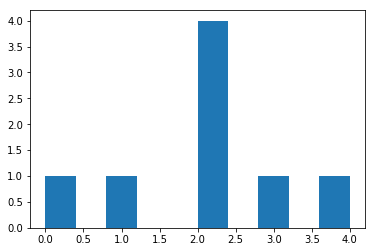

In [26]:
# Plot degree distribution
plt.hist(degrees)
plt.show()

### b. Centrality

Centrality quantifies how 'central' or how 'important' the node is within a network. There are multiple centrality measures, including degree centrality, betweenness centrality, and closeness centrality. 

For example, betweenness centrality is defined by the number of times a node is on the shortest path between two other nodes. The figure below shows one instance when the node **i** is on the shortest path between the two connected nodes.

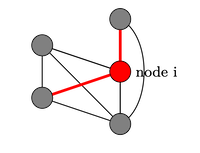

In [27]:
# Degree centrality (above)
nx.degree_centrality(G1)

{'A': 0.143,
 'C': 0.286,
 'D': 0.571,
 'K': 0.429,
 'L': 0.286,
 'M': 0.286,
 'B': 0.286,
 'F': 0.000}

In [28]:
# Betweenness centrality
nx.betweenness_centrality(G1)

{'A': 0.000,
 'C': 0.000,
 'D': 0.524,
 'K': 0.381,
 'L': 0.000,
 'M': 0.000,
 'B': 0.000,
 'F': 0.000}

In [29]:
# Closeness centrality
nx.closeness_centrality(G1)

{'A': 0.396,
 'C': 0.429,
 'D': 0.643,
 'K': 0.571,
 'L': 0.396,
 'M': 0.396,
 'B': 0.429,
 'F': 0.000}

### c. Clustering coefficient

Clustering coefficient of a node quantifies how likely the neighbors of the node are to 'cluster' together, or more formally, to form a fully connected clique. In the figure below, the neighbors of node **i** are not fully connected because there are missing edges (dotted red line). 

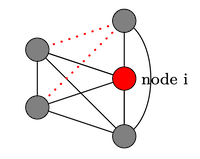

In [30]:
# Get clustering coefficient of each node
nx.clustering(G1)

{'A': 0,
 'C': 1.000,
 'D': 0.167,
 'K': 0.333,
 'L': 1.000,
 'M': 1.000,
 'B': 1.000,
 'F': 0}

In [31]:
# Average clustering coefficient of the network
cc = nx.clustering(G1)
avg_clust = sum(cc.values()) / len(cc)
print(avg_clust)

0.5625


### d. Density calculation (as defined in the lecture)

Here we will calculate the care density introduced during the lecture. Care density was defined as total number of shared patients / total number of pairs of doctors.

Let's assume that the network we created represent one patient's providers over a period of time. The total number of patient-sharing can be obtained by the sum of the edge weights. The total number of pairs of doctors would be n*(n-1)/2 where n is the number of docors this patient saw in the network. 

In [32]:
# In the network we created, there are 8 nodes. 
n_nodes = 8
total_n_pairs = (n_nodes*(n_nodes-1)/2)

In [33]:
# First, assign weight of 1 to the edges without assigned weight (we assigned a weight to a single edge above).

for u, v in G1.edges:
    if G1[u][v] == {}:
        G1[u][v]['weight'] = 1

In [34]:
# Get the list of edge weights
edge_weight_list = [G1[u][v]['weight'] for u,v in G1.edges]

In [35]:
edge_weight_list

[1, 1, 1, 5, 1, 1, 1, 1]

In [36]:
# The sum of edge weights
edge_weight_sum = sum(edge_weight_list)

In [37]:
# Let's calculate the density
density = edge_weight_sum / total_n_pairs

In [38]:
print('Density of the network:', density)

Density of the network: 0.42857142857142855


## 4. Visualization using NetworkX

While simple visualization is possible with NetworkX, more sophisticated visualization is possible using tools like Gephi (see below).

In [39]:
# Plot a graph using nx.draw function

/Users/yoonyoungpark/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


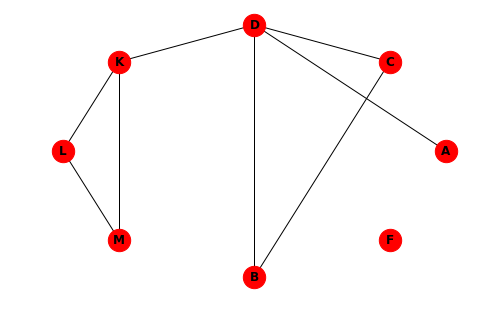

In [40]:
nx.draw_circular(G1, node_size=500, node_color='red', with_labels=True, font_weight='bold')

An example of graph drawn with Gephi (https://gephi.org/images/screenshots/layout1.png)

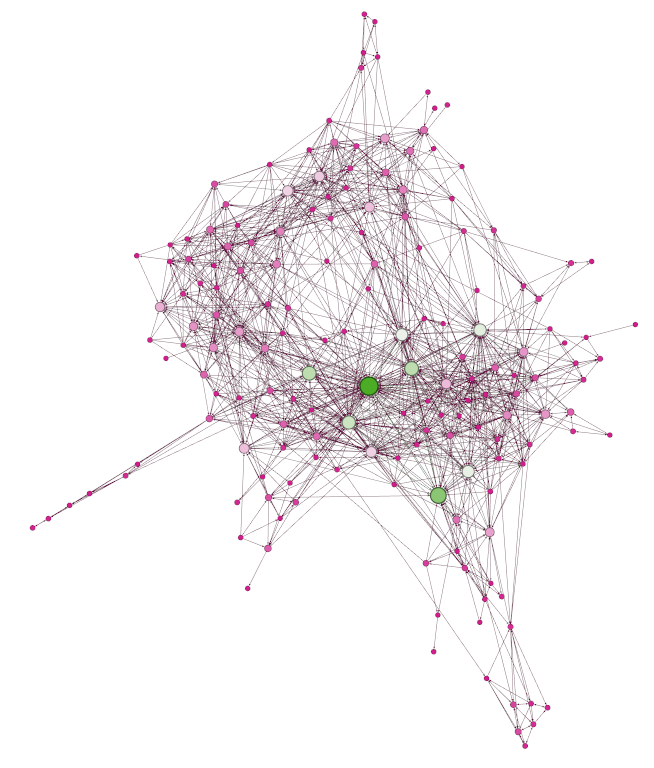

## An example of using network properties in clinical prediction models

Once you obtain network properties (e.g. degree, clustering coefficient, centrality, etc.) there are multiple ways that you can use them in your research. One way is to use them as predictors in clinical prediction model. 

As an example, see [Park et al (2019)](https://journals.plos.org/plosone/article?id=10.1371/journal.pone.0211218)

In this paper, we first constructed a hierarchical provider network for patients admitted to a hospital with a heart disease. We then used the properties of provider network (e.g. degree and betweenness centrality, clustering coefficient, modularity) as patient-level predictors in regression models predicting in-hospital mortality and length of hospital stay. We found that after adjusting for patients' clinical characteristics, network features were significantly associated with both of the clinical outcomes of interest. 


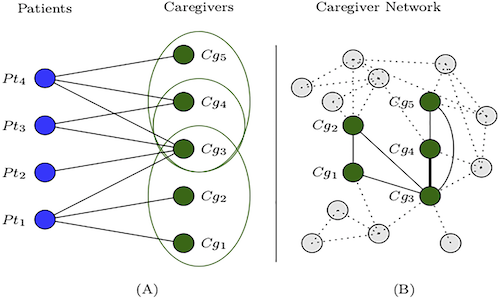

## An example of network visualization tool 

This is a simple visualization tool developed by colleaguest at IBM. The source codes will be made available upon request (please send a request to yoonyoung.park@ibm.com)

The tool ingests claims or other forms of electronic health data that has provider and patient identifiers, so that bipartite graph can be generated like the above and then displayed as 2D or 3D graphs. It can then be projected to show provider-provider network with patient-sharing edges.

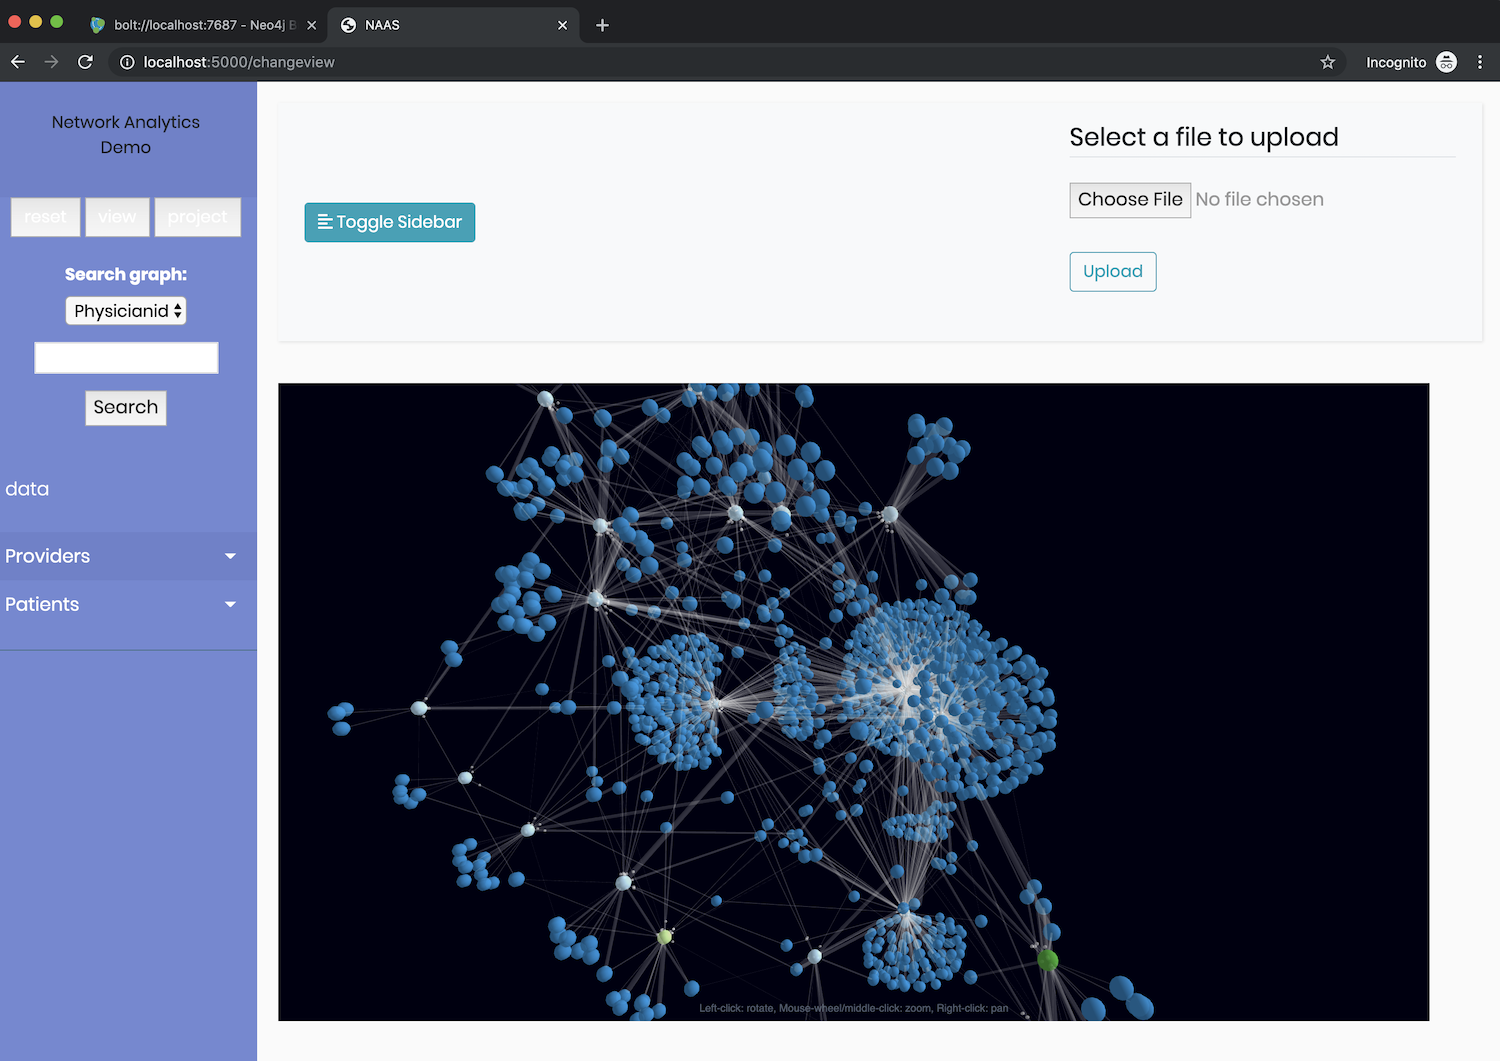







# II. Network Analysis with Healthcare Data

In the second part of this session, we will use a sample of synthetic public data (Medicare claims data) to create a patient-sharing network, obtain network properties, and visualize the network. 

## Hands-on demonstration

#### [Synthetic medicare claims dataset link](https://www.cms.gov/Research-Statistics-Data-and-Systems/Downloadable-Public-Use-Files/SynPUFs/DE_Syn_PUF.html)

The sample file we'll be using has 2000 rows. Load the data by one of the two methods below.

- Run the cell below 
- [Direclty download the sample claims file](https://github.com/yypark24/amia2020_network_workshop/blob/master/claims_sample.csv) - right-click 'Raw' button on the top right corner and click 'Save Link As...', then run the commented out cell below

In [41]:
url = 'https://github.com/yypark24/amia2020_network_workshop/raw/master/claims_sample.csv'
df_claims = pd.read_csv(url, index_col=0)

In [42]:
# Run the cell below if you downloaded the file locally

In [43]:
# filepath = "" # path to the folder where you downloaded the file
# df_claims = pd.read_csv(filepath + 'claims_sample.csv') 

In [44]:
n_pt=df_claims['DESYNPUF_ID'].nunique()
print('N patients: '+str(n_pt))
n_npi=df_claims['AT_PHYSN_NPI'].nunique()
print('N providers: '+str(n_npi))

N patients: 201
N providers: 1415


In [45]:
# Reduce claims file to the columns we are interested in - that is
# patient id, attending provider npi, claim id, claim payment amount

columns=['DESYNPUF_ID', 'AT_PHYSN_NPI', 'CLM_ID', 'CLM_PMT_AMT'] # pt_id, npi, claim_id, total_charge
def get_pt_npi(df,columns):
    # Turn df_claims to a dataframe for networkx - and keep only useful columns
    # For each patient and provider pair that appears on df, collect the number of claims issued and total cost
    # rename columns accordingly
    # Arg:
        # df (pandas dataframe): df of claims 
        # columns (list): list of columns to use - first two columns are the patient id and npi
    # Return:
        # df_pt_npi (pandas dataframe)

    df_pt_npi=df[columns].groupby([columns[0], columns[1]]).agg(['count','sum'])
    df_pt_npi.drop(columns=[(columns[2],'sum'),(columns[3],'count')],inplace=True)
    df_pt_npi.columns = df_pt_npi.columns.map('_'.join)
    df_pt_npi.rename(columns={list(df_pt_npi)[0]: 'count',list(df_pt_npi)[1]: 'tot_cost'},inplace=True)
    
    df_pt_npi.reset_index(inplace=True)
    return df_pt_npi

df_pt_npi=get_pt_npi(df_claims,columns)

###
try:
    display(df_pt_npi.head())
except:
    print(df_pt_npi.head())

,DESYNPUF_ID,AT_PHYSN_NPI,count,tot_cost
0,00013D2EFD8E45D1,4.824842e+09,1,50.0
1,00016F745862898F,2.963420e+09,1,30.0
2,00016F745862898F,5.737808e+09,1,30.0
3,0001FDD721E223DC,1.233848e+09,1,30.0
4,00024B3D2352D2D0,1.449019e+09,1,10.0


### Bipartite graph (2-mode graph)
- A bipartite graph is a graph whose the nodes can be split on two sets, with no intra-set connections (but only inter-connections).
- In our case, patients (providers) are not connected with each other directly, but only through providers (patients).
- On the practical side of things: We can choose whether (and if) we will use the 'count' or 'tot_cost' as the weight of the edge between a patient and provider, or just as an attribute of an edge
- Here we choose the 'count' of visits of a patient to a provider as the weight and the 'tot_cost' as an edge attribute - We will have to rename 'count' column to 'weight'

In [46]:
df_pt_npi.rename(columns={'count':'weight'},inplace=True) # renaming column
cols_pt_npi=list(df_pt_npi) # columns of df_pt_npi
B = nx.from_pandas_edgelist(df_pt_npi, cols_pt_npi[0], cols_pt_npi[1], cols_pt_npi[2:4])

In [47]:
print('N of nodes: '+str(B.number_of_nodes())) # total number of nodes
print('N of edges: '+str(B.number_of_edges())) # total number of edges

N of nodes: 1615
N of edges: 1522


#### Questions
- What is the number of patient (or provider) nodes in this graph?
- What is the degree of the patient node "'00013D2EFD8E45D1'" and "4824842417.0"?
- What is the weight of edge of the pair of nodes "'00013D2EFD8E45D1'" and "4824842417.0"?
- What is the degree distribution of the patients, and providers? (can also be computed using the df_pt_npi object)
- What is the clustering coeficient of each node in the graph?

### Projected Graph (1-mode graph)
- Now we can generate the patient-sharing provider network by projecting the bipartite graph on the provider side (as seen in the slides)
- We will have to let networkx know which set of nodes we want to do the projection to

In [48]:
from networkx.algorithms import bipartite
proj_nodes = set(df_pt_npi[cols_pt_npi[1]]) # nodes we will project on (providers)
G2 = bipartite.weighted_projected_graph(B, proj_nodes) # for weighted projected graphs
# G2 = bipartite.projected_graph(B, proj_nodes) # for unweighted projected graph

#### Questions
- What is the maximum (and minimum) degree of nodes in the graph G?
- Which are the top 50 provides in terms of betweeness centrality?
- Why are there nodes (providers) with degree 0?
- Optional: Can you remove the nodes with degree 0 from the graph G

### Graph Components
- A graph is not always one component - it may be composed of disconnected compoments (subgraphs) 
where it is not possible to reach any node from any node in the graph.
- The giant component is the largest (in terms of nodes) compoment of the graph

In [49]:
# all of the components of graph G
components=nx.connected_components(G2) # this function is an iterator (python object)
giant = max(components, key=len) # returns a graph object - finding the max takes O(N) time

# sorting all disconnected components in a list (with graphs as objects) - sorting a list takes O(NlogN) time
components_sorted = sorted(nx.connected_components(G2), key=len, reverse=True)

#### Questions
- What is the number of disconnected components of G?
- What is largest connected component of the graph (namely, giant component) - see below
- Optional: compare the "macro" properties of two disconnected components, such as 
    the number of nodes (and edges), average degree, average clustering coefficient, etc
- See below for how to visualize them; can you visually capture their macroscopic properties?

### Community Detection
- Communities are clusters of nodes whose nodes are more closely connected with each other (that with nodes not outside of the cluster)
- There are multiple metrics for measuring the quality of the partition of the graph into communities
- In addition, there are mutltiple algorithms for various metrics
- Here we will use Clauset-Newman-Moore algorithm which is based on maximizing the modularity metric. This algorithm can be used for both unweighted and weighted graphs, however networkx only supports the unweighted version of it
- Networkx functions for communities can be found [here](https://networkx.github.io/documentation/stable/reference/algorithms/community.html)
- There is another Python (and R) module for graphs that is better for community detection, namely [igraph](https://igraph.org/redirect.html)
- Be aware that community detection algorithms can be computationaly heavy (NP-hard process) 

In [50]:
from networkx.algorithms import community

In [51]:
communities_generator = community.girvan_newman(G2) # using the Clauset-Newman-Moore algorithm - based on Modularity Optimization
# The alg. generates multiple partitions, with the partition with the highest modularity being:
top_level_communities = next(communities_generator) 
# This is a tuple of the sets of nodes per community
# We can evaluate the quality of this partition below

### Optional: Measuring the quality of the partitions of a graph
#### Modularity
*Modularity* is one measure of the structure of networks or graphs. It was designed to measure the strength of division of a network into modules (also called groups, clusters or communities). Networks with high modularity have dense connections between the nodes within modules but sparse connections between nodes in different modules.

$${\displaystyle Q={\frac {1}{(2m)}}\sum _{vw}\left[A_{vw}-{\frac {k_{v}k_{w}}{(2m)}}\right]\delta (c_{v},c_{w})}$$


where weighted graphs (unweighted graphs):
- $A_{vw}$ is the weight of edge $vw$ (1 or 0 for unweighted graphs)
- $m$ is the sum of the weights of edges in the graph (total number of edges of unweighted graphs)
- $k_v$ is the sum of the weights of node $v$ (the degree of node $v$)
- $\delta$ is the delta function
- $c_v$ the community of node $v$

#### Coverage
The *coverage* of a partition is the ratio of the number of intra-community edges to the total number of edges in the graph.
#### Performance
The *performance* of a partition is the ratio of the number of intra-community edges plus inter-community non-edges with the total number of potential edges.


In [52]:
# partition quality metrics with networkx:
mod=community.modularity(G2,top_level_communities) # modularity
cov=community.coverage(G2, top_level_communities) # coverage
perf=community.performance(G2, top_level_communities) # performance

#### Questions 
- How many communities did we detect?
- How many nodes does the largest community has? 
- What is the distribution of nodes per community? Optional: Sort it and plot it. 
- What are the theoretical bounds (min and max potential value) of the modularity metric?
- What is the modularity of our partition?
- Optional: Create a dictionary of the node to the community it belongs (Solution right below)
- Optional: Assign that community info per node as an attribute to graph object G (Solution right below)
- Optional: Check if nodes now have their assigned community as an node-attribute

In [53]:
# Create a dictionary of the node to the community it belongs
def node_community(set_of_communities):
    # Turn the set of communities to a dictionary of the community of each node
    # Arg:
        # 
    # Return: 
        # dct_com (dictionary): node id as key, community as value
    dct_com={}
    community=0
    for com_i in set_of_communities:
        for node in com_i:
            dct_com[node]=community
        community=community+1
    return dct_com

dct_com=node_community(top_level_communities)

# Assigning that community info per node as an attribute to graph object G
nx.set_node_attributes(G2, dct_com, name='community')

# Checking if nodes now have their assigned community as an node-attribute
list(G2.nodes(data=True))[0:10]

[(4123885573.000, {'community': 0}),
 (7235403781.000, {'community': 1}),
 (7818174481.000, {'community': 2}),
 (95092757.000, {'community': 3}),
 (9390964763.000, {'community': 4}),
 (3187875884.000, {'community': 5}),
 (4849860656.000, {'community': 6}),
 (4341915698.000, {'community': 7}),
 (5107449910.000, {'community': 8}),
 (4020437050.000, {'community': 9})]

#### Writing the graph
- A couple of graph write options are listed below (more options [here](https://networkx.github.io/documentation/stable/reference/readwrite/index.html)):

In [54]:
nx.write_gpickle(G2,'G2_graph.gpickle') # write for gephi visualizations
nx.write_gexf(G2,'G2_graph.gexf') # write for gephi visualizations

#### Graph Visualizations
- Graphs are typically multidimensional, making it a challenge to visualize in 2-D
- Sophisticated algorithms have to be used for this process with mixed success
- Moreover, the more the nodes (and/or edges) the messier the 2D represention is going to be
- Networkx offers very basic visualizations, 
- See the functions [here](https://networkx.github.io/documentation/stable/reference/drawing.html)
- See networkx examples [here](https://networkx.github.io/documentation/stable/auto_examples/index.html)
- A couple of example are seen below
- Optional: More sophisticated visualizations using the tool Gephi (free), you will have to write the graph as a '.gexf' object to load it with Gephi

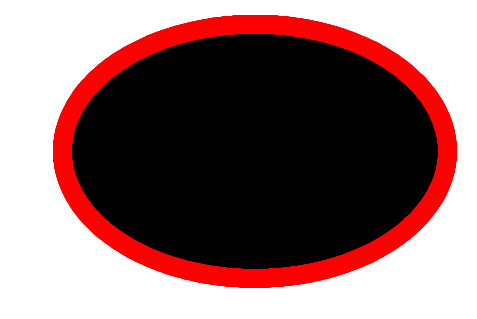

In [55]:
# Example 1: Just placing the nodes in a cycle may not look good if the nodes are too many:
import matplotlib.pyplot as plt
nx.draw_circular(G2)
plt.show()

#### Questions
- Using the visualization code above to plot different disconnected components
- What do you observe as you select different components?

In [56]:
# - Example 2: We will make an attempt using the function below (it requires the module pydot)
import matplotlib.pyplot as plt
import networkx as nx

try:
    import pygraphviz
    from networkx.drawing.nx_agraph import graphviz_layout
except ImportError:
    try:
        import pydot
        from networkx.drawing.nx_pydot import graphviz_layout
    except ImportError:
        raise ImportError("This example needs Graphviz and either "
                          "PyGraphviz or pydot")

pos = graphviz_layout(G2, prog='twopi')
plt.figure(figsize=(8, 8))
nx.draw(G2, pos, node_size=20, alpha=0.5, node_color="blue", with_labels=False)
plt.axis('equal')
plt.show()

The above visualization should look similar to this:

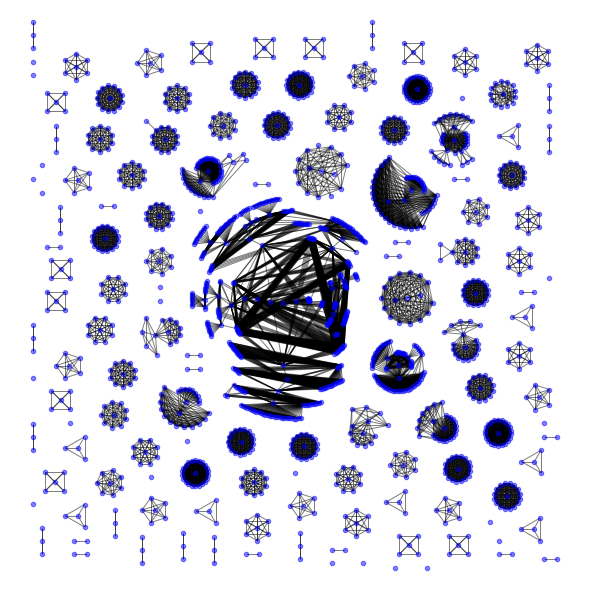